## Gender Identification Model

### Introduction
Given that we currently only have 30% of our Fuel Users' gender data. There is an increasing need for establishing the distribution of Male and Female individuals within our customer base. This is for various reasons among them being Public Affairs reporting and grants.

### Problem Statement
#### Given the name, can we identify the gender of the person?

### Solution
#### The proposed fix for this problem is to build a name-based gender identification system on machine learning. For this project we will limit gender to only ‘Male’ and ‘Female.’ Hence this becomes a binary classification model.

### Methodology
This project follows the below approach:

1. Import libraries
2. Load the dataset
3. Exploratory Analysis and Pre-Transformations
4. Encoding the labels
5. Count vectorization of predictor text values
6. Splitting the dataset into training and testing sets
7. Building models; logistic regression, naive Bayes, XGBoost, K-Nearest Neighbors
8. Comparison of results of the above models and Choosing Best Model
9. Running Model on Genderized Data for Validation
10. Compare Predictions with Captured Gender Data
11. Build a Merged Training Dataset, Train and Save the Improved Model
12. Running Prediction on Entire Customer Profile Data
13. Visualize Gender Proportions
14. Output Predictions
15. Notes

#### Import Libraries

In [1]:
## libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import re
import pickle

import time

In [2]:
# Start the timer
start_time = time.time()

#### Load Dataset

In [3]:
## load the initial Train dataset
dt = pd.read_csv("../../Njambanene/Tasks/Name_Identification/Feb  Members Spend Analysis  - Active 1 Members.csv")

#### Exploratory Analysis and Pre-Transformations

In [4]:
#### Sample the dataset
dt.head(10)

,Member Name,Gender
0,MUOKI,Male
1,PEACE,Female
2,MWIYERIA KANANA,Female
3,JACKLINE,Female
4,JANE MUTHONI,Female
5,JAMES WM,Male
6,BERNARD OBURA,Male
7,LUCY,Female
8,FREDERICK OTIENO,Male
9,MARY GITAU,Female


In [5]:
## rename column
dt = dt.rename(columns={'Member Name': 'Name'})

In [6]:
## Check data types and attributes
print(dt.columns)

print(dt.dtypes)

Index(['Name', 'Gender'], dtype='object')
Name      object
Gender    object
dtype: object


In [7]:
def count_one_word_names(name):
  """Counts the number of names with one word in a list of names.

  Args:
    names: A list of names.

  Returns:
    The number of names with one word.
  """

  count = 0
  for name in name:
    if len(name.split()) == 1:
      count += 1
  return count


In [8]:
## proportion of one-word names
one_word_names = round(count_one_word_names(dt['Name'])/len(dt)*100,2)

print(f"The proportion of one-word names is: {one_word_names}%")

The proportion of one-word names is: 48.07%


In [9]:
# names = dt['Name'].apply(lambda x: x.lower())

In [10]:
## replace col values
# dt['Gender'] = dt['Gender'].replace({0:"M",1:"F"})

In [11]:
## shape of data
print(dt.shape)

(12874, 2)


In [12]:
## Function for Cleaning Names
def clean_name(value):
    # Convert float values to string
    if isinstance(value, float):
        value = str(value)

    # Remove the pattern and everything after it
    pattern = r"\b(?:DO NOT|DONT|SAYS|REQUEST|LOCK|NOT|REQUESTED|ACCOUNT|TRANSFER|CUSTOMERS|DONOT|REPORTED|LOST|STOLEN|COOKER|CANISTER|KINDLY|GIVE)\b.*"
    drop_nonnames = re.sub(pattern, '', value)

    # remove 'Customer'
    pattern = r"\bCUSTOMER|CLIENT\b"
    drop_identifiernames = re.sub(pattern,'',drop_nonnames)


    # Truncate the name to the first three words
    words = drop_identifiernames.split()
    truncated_words = words[:3]
    truncated_name = ' '.join(truncated_words)

    # Remove extraneous white spaces using regular expression substitution
    dropped_whitespaces = re.sub(r'\s+', ' ', truncated_name)

    # Drop non-name words and remove characters after hyphen, underscore, or brackets
    pattern = r"\b(?:[^A-Za-z\s]|(?!^)\d)\b|[-_()\[\]]"
    names_only = re.sub(pattern, '', dropped_whitespaces)

    # Remove special characters (excluding spaces) from the name
    pattern = r'[^A-Za-z\s]'
    cleaned_name = re.sub(pattern, '', dropped_whitespaces)

    return cleaned_name.strip()


In [13]:
# Apply the clean function to the 'Name' column
dt['Cleaned Name'] = dt['Name'].apply(clean_name)#apply(convert_float_and_remove_numbers).apply(truncate_drop_and_clean)
dt.head()

,Name,Gender,Cleaned Name
0,MUOKI,Male,MUOKI
1,PEACE,Female,PEACE
2,MWIYERIA KANANA,Female,MWIYERIA KANANA
3,JACKLINE,Female,JACKLINE
4,JANE MUTHONI,Female,JANE MUTHONI


In [14]:
## unique names 
print(len(dt['Cleaned Name'].unique()))

7807


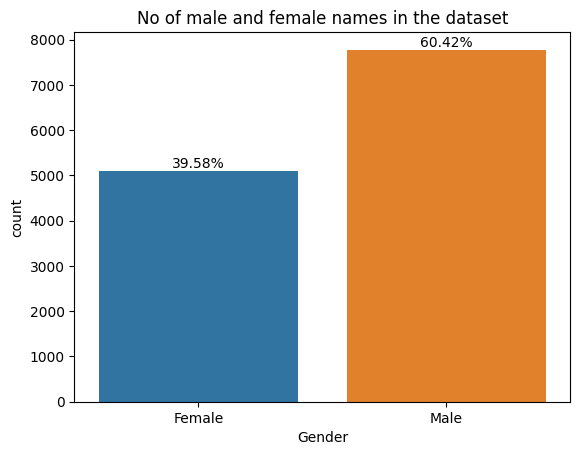

In [15]:
## plot for male and female names in the data
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
ax = sns.countplot(x='Gender', data=dt)

# Calculate the proportions for each category
total = len(dt)
counts = dt['Gender'].value_counts()
proportions = counts / total

# Sort the counts and proportions in descending order
sorted_counts = counts.sort_values(ascending=True)
sorted_proportions = proportions.loc[sorted_counts.index]


# Add the proportions as annotations
for i, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    label = f"{sorted_proportions[i]:.2%}"
    ax.annotate(label, (x, y), ha='center', va='bottom')

sns.countplot(x='Gender', data=dt)
plt.title('No of male and female names in the dataset')
plt.xticks([0,1],('Female','Male'))
plt.show()

In [16]:
## analyze starting letters of names
alphabets= ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P',

            'Q','R','S','T','U','V','W','X','Y','Z']

startletter_count = {}

for i in alphabets:

    startletter_count[i] = len(dt[dt['Name'].str.startswith(i)])

print(startletter_count)

{'A': 796, 'B': 464, 'C': 726, 'D': 603, 'E': 982, 'F': 434, 'G': 431, 'H': 249, 'I': 178, 'J': 1677, 'K': 325, 'L': 579, 'M': 1642, 'N': 463, 'O': 62, 'P': 753, 'Q': 8, 'R': 577, 'S': 987, 'T': 276, 'U': 4, 'V': 266, 'W': 334, 'X': 0, 'Y': 21, 'Z': 37}


Text(0.5, 1.0, 'Number of names starting with each letter')

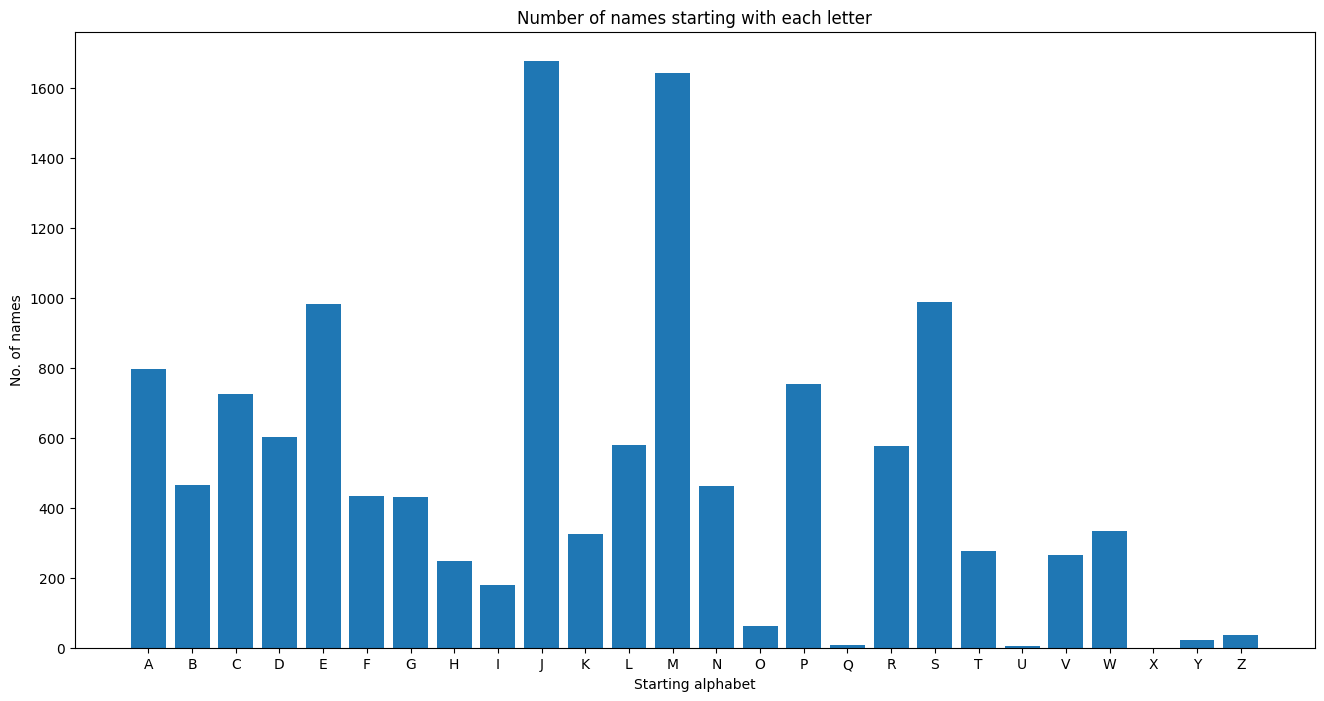

In [17]:
## visualize starting letters
plt.figure(figsize = (16,8))

plt.bar(startletter_count.keys(),startletter_count.values())

plt.xlabel('Starting alphabet')

plt.ylabel('No. of names')

plt.title('Number of names starting with each letter')

In [18]:
## check most common starting alphabets
print('The 5 most common starting letters are : ', *sorted (startletter_count.items(),key=lambda item: item[1])[-5:][::-1])

The 5 most common starting letters are :  ('J', 1677) ('M', 1642) ('S', 987) ('E', 982) ('A', 796)


In [19]:
## analyze ending letters of names
small_alphabets = ['a','b','c','d','e','f','g','h',

                   'i','j','k','l','m','n','o','p','q','r','s','t','u','v','x','y','z']

endletter_count ={}

for i in small_alphabets:
    endletter_count[i] = len(dt[dt['Name'].str.endswith(i)])

print(endletter_count)

{'a': 2, 'b': 0, 'c': 0, 'd': 0, 'e': 0, 'f': 0, 'g': 0, 'h': 0, 'i': 2, 'j': 0, 'k': 0, 'l': 0, 'm': 0, 'n': 0, 'o': 2, 'p': 0, 'q': 0, 'r': 0, 's': 0, 't': 0, 'u': 5, 'v': 0, 'x': 0, 'y': 0, 'z': 0}


Text(0.5, 1.0, 'Number of names ending with each letter')

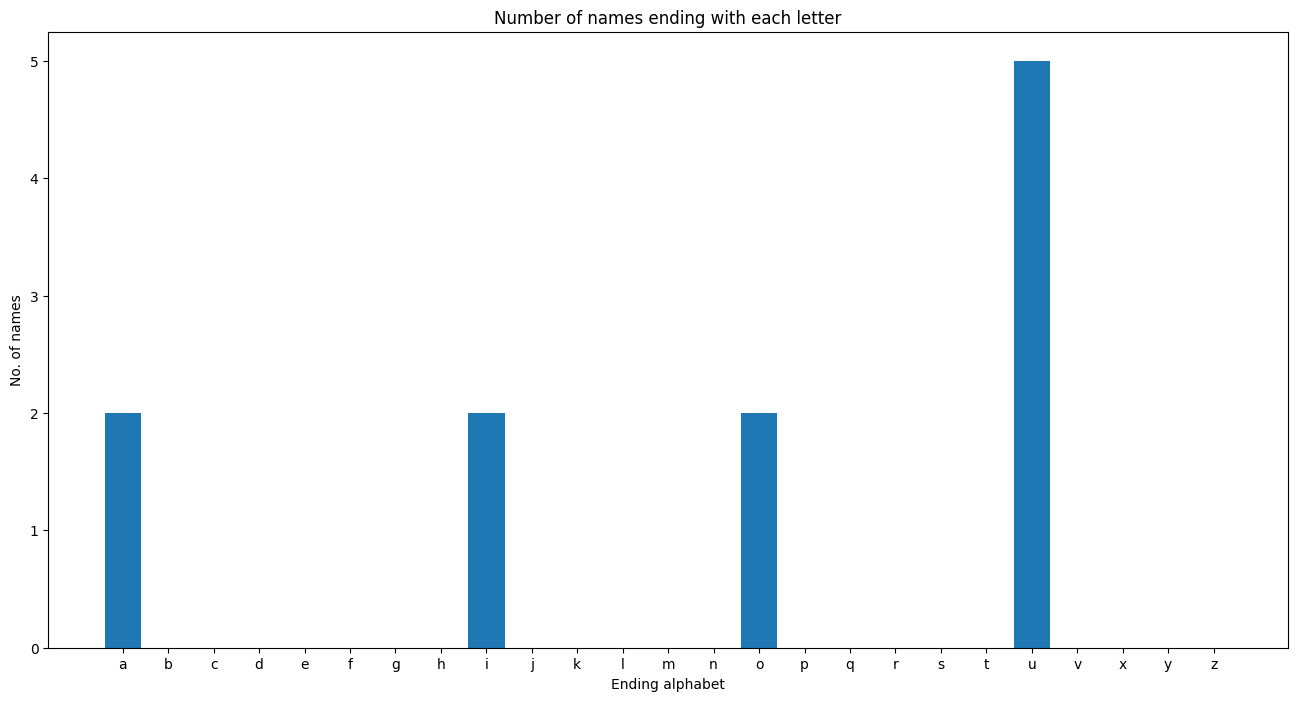

In [20]:
plt.figure(figsize = (16,8))

plt.bar(endletter_count.keys(),endletter_count.values())

plt.xlabel('Ending alphabet')

plt.ylabel('No. of names')

plt.title('Number of names ending with each letter')

In [21]:
## most common name ending letters
print("The 5 most name ending letters are : ",*sorted(endletter_count.items(),
                                                      key=lambda item: item[1])[-5:][::-1])

The 5 most name ending letters are :  ('u', 5) ('o', 2) ('i', 2) ('a', 2) ('z', 0)


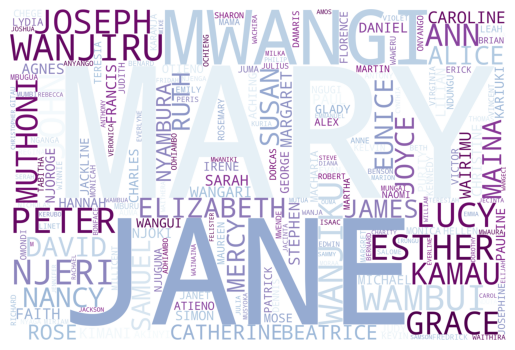

In [22]:
# building a word cloud

text =  " ".join(i for i in dt.Name)

word_cloud = WordCloud(

        width=3000,

        height=2000,

        random_state=1,

        background_color="white",

        colormap="BuPu",

        collocations=False,
        stopwords= STOPWORDS,

        ).generate(text)

plt.imshow(word_cloud)

plt.axis("off")    

plt.show()

In [23]:
## build model
X = list(dt['Cleaned Name'])
Y = list(dt['Gender'])

In [24]:
Y[0]

'Male'

##### Concepts Definitions
1. Label Encoding: This refers to the process of converting categorical labels into numeric labels. Here each categorical label is given a specific value based on its alphabetical ordering.

2. Count Vectorization: Count vectorization is the process where all the words in the corpus are converted into numerical data based on their frequency in the corpus. It converts textual data into a sparse matrix.

#### Encode Labels

In [25]:
## encode the labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

#### Count Vectorization

In [26]:
## count vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = 'char')
X = cv.fit_transform(X).toarray()



#### Split Dataset into Train & Test

In [27]:
## split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state= 42)

#### Build Models

In [28]:
## logistic regression
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)
LR_y_pred = LR_model.predict(x_test)

In [29]:
## Naive Bayes
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()
NB_model.fit(x_train, y_train)
NB_y_pred = NB_model.predict(x_test)

In [30]:
## random forest
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(x_train, y_train)
RF_y_pred = RF_model.predict(x_test)


In [31]:
## K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Create an instance of the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model
knn_model.fit(x_train, y_train)
knn_y_pred = knn_model.predict(x_test)


In [32]:
## preview prediction output
# df_predictions2 = pd.DataFrame({'Name': dt.loc[range(len(x_test)),'Name'], 'Predicted_Gender': encoder.inverse_transform(knn_y_pred)})
# df_predictions2.head()

In [33]:
## XGBoost
from xgboost import XGBClassifier


# Define the seed
seed = 42

XGB_model = XGBClassifier(random_state= seed) #use_label_encoder = False
XGB_model.fit(x_train,y_train)
XGB_y_pred = XGB_model.predict(x_test)


In [34]:
## preview prediction output

RF_y_pred = RF_y_pred.tolist()
df_predictions = pd.DataFrame({'Cleaned Name': dt.loc[range(len(x_test)), 'Cleaned Name'], 'Predicted_Gender': encoder.inverse_transform(RF_y_pred)})
df_predictions.head()

,Cleaned Name,Predicted_Gender
0,MUOKI,Male
1,PEACE,Female
2,MWIYERIA KANANA,Male
3,JACKLINE,Female
4,JANE MUTHONI,Female


#### Comparison of Performance

In [35]:

### function for confusion matrix
from sklearn.metrics import confusion_matrix
def cmatrix(model):
    y_pred = model.predict(x_test)
    cmatrix = confusion_matrix(y_test,y_pred)
    print(cmatrix)
    sns.heatmap(cmatrix,fmt = 'd',cmap='BuPu', annot=True)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Confusion Matrix')

Accuracy: 71.55%
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      2564
           1       0.68      0.54      0.60      1685

    accuracy                           0.72      4249
   macro avg       0.71      0.68      0.69      4249
weighted avg       0.71      0.72      0.71      4249

[[2138  426]
 [ 783  902]]
None


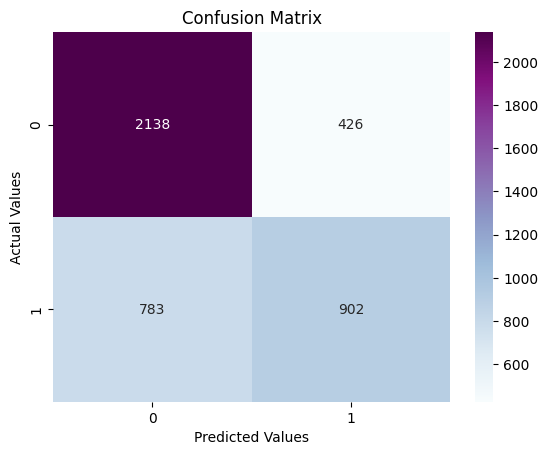

In [36]:
## output
import sklearn.metrics as metrics

# for logistic regression
accuracy = metrics.accuracy_score(LR_y_pred,y_test)
print("Accuracy: %.2f%%" % (accuracy*100))

print(metrics.classification_report(y_test,LR_y_pred))
print(cmatrix(LR_model))

Accuracy: 67.66%
              precision    recall  f1-score   support

           0       0.69      0.84      0.76      2564
           1       0.64      0.43      0.51      1685

    accuracy                           0.68      4249
   macro avg       0.66      0.63      0.64      4249
weighted avg       0.67      0.68      0.66      4249

[[2153  411]
 [ 963  722]]
None


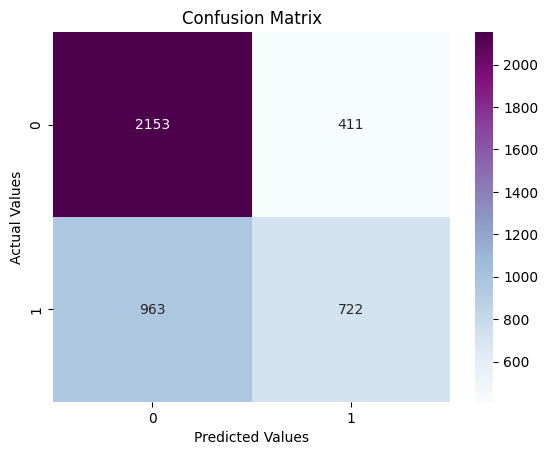

In [37]:
# for naive bayes

accuracy = metrics.accuracy_score(NB_y_pred,y_test)
print("Accuracy: %.2f%%" % (accuracy*100))

print(metrics.classification_report(y_test, NB_y_pred))

print(cmatrix(NB_model))

Accuracy: 87.93%
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2564
           1       0.88      0.80      0.84      1685

    accuracy                           0.88      4249
   macro avg       0.88      0.87      0.87      4249
weighted avg       0.88      0.88      0.88      4249

[[2381  183]
 [ 330 1355]]
None


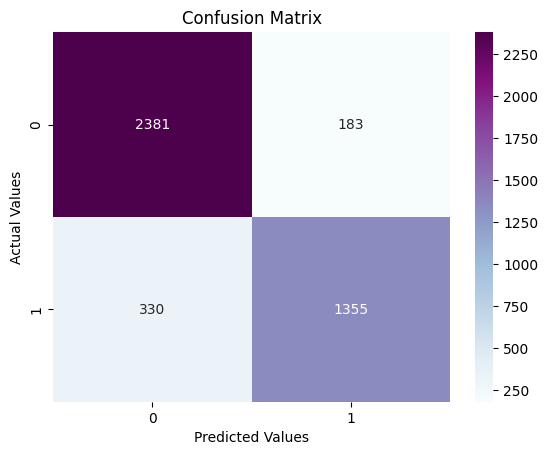

In [38]:
# for random forest
accuracy = metrics.accuracy_score(RF_y_pred,y_test)

print("Accuracy: %.2f%%" % (accuracy*100))

print(metrics.classification_report(y_test,RF_y_pred))

print(cmatrix(RF_model))

Accuracy: 84.00%
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2564
           1       0.83      0.75      0.79      1685

    accuracy                           0.84      4249
   macro avg       0.84      0.82      0.83      4249
weighted avg       0.84      0.84      0.84      4249

[[2303  261]
 [ 419 1266]]
None


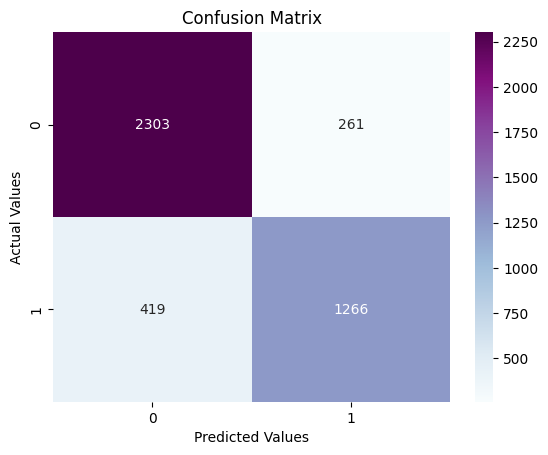

In [39]:
# for knn
accuracy = metrics.accuracy_score(knn_y_pred,y_test)

print("Accuracy: %.2f%%" % (accuracy*100))

print(metrics.classification_report(y_test,knn_y_pred))

print(cmatrix(knn_model))

Accuracy: 86.35%
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      2564
           1       0.84      0.80      0.82      1685

    accuracy                           0.86      4249
   macro avg       0.86      0.85      0.86      4249
weighted avg       0.86      0.86      0.86      4249

[[2315  249]
 [ 331 1354]]
None


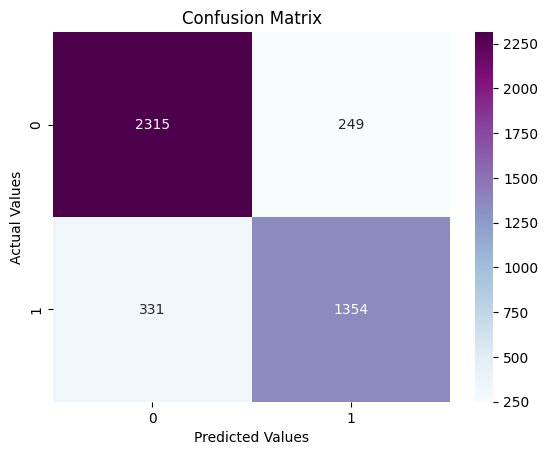

In [40]:
# for XGBoost
# print(metrics.accuracy_score(XGB_y_pred,y_test))

accuracy = metrics.accuracy_score(XGB_y_pred,y_test)
print("Accuracy: %.2f%%" % (accuracy*100))

print(metrics.classification_report(y_test, XGB_y_pred))

print(cmatrix(XGB_model))

#### Choosen Model

In [41]:
import joblib
# Create a Random Forest model and save it then call

# Define the seed
seed = 42

RF_model = RandomForestClassifier(random_state=seed)
RF_model.fit(x_train, y_train)

# Save the model to a file
joblib.dump(RF_model, 'rf_model.pkl')

# Load the model from the file
loaded_rf_model = joblib.load('rf_model.pkl')

# Make predictions using the ensemble model
RF_y_pred = loaded_rf_model.predict(x_test)

# RF_y_pred = RF_model.predict(x_test)

In [42]:
## preview prediction output

RF_y_pred = RF_y_pred.tolist()
dt_predictions = pd.DataFrame({'Cleaned Name': dt.loc[range(len(x_test)), 'Name'], 'Predicted_Gender': encoder.inverse_transform(RF_y_pred)})
dt_predictions.head()

,Cleaned Name,Predicted_Gender
0,MUOKI,Male
1,PEACE,Female
2,MWIYERIA KANANA,Male
3,JACKLINE,Female
4,JANE MUTHONI,Female


In [43]:
dt_predictions.shape

(4249, 2)

#### Run predictions on Genderized data for Validation 

In [44]:
# import os

# pydomo_client_id = os.getenv('PYDOMO_CLIENTID')
# pydomo_secret = os.getenv('PYDOMO_SECRET')



In [45]:
## create domo python connection
from pydomo import Domo
from dotenv import dotenv_values


env_values = dotenv_values('.env')

domo = Domo(env_values['PYDOMO_CLIENTID'], env_values['PYDOMO_SECRET'])

In [46]:
# Download a data set from Domo
cust_prof_gender = domo.ds_get('9e6aecb0-9669-4787-894d-43c496b4c928')
cust_prof_gender.head()

,customer_id,num_canisters,name,gender,is_club_customer
0,3174531,1,DAMARIS WANGARI,1,0
1,1111966,1,MARY NGLN,1,0
2,1249576,1,AMIR,2,0
3,841007,1,LEAH,1,0
4,1657921,1,GRACE,1,0


In [47]:
## drop unnecessary columns
cust_prof_gender = cust_prof_gender.drop(['num_canisters','is_club_customer'],axis=1)

In [48]:
# Map values from 1 to "female" and 2 to "male" in the 'Gender' column
cust_prof_gender['gender'] = cust_prof_gender['gender'].map({1: 'Female', 2: 'Male'})
cust_prof_gender['gender'].value_counts(normalize=True)

Female    0.563862
Male      0.436138
Name: gender, dtype: float64

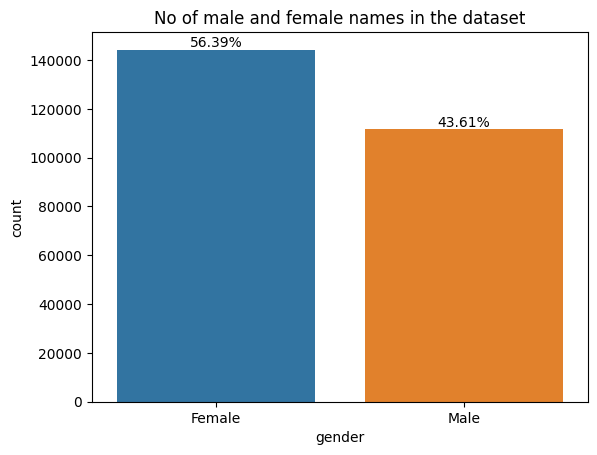

In [49]:
## plot for male and female names in the loaded data

# Create the countplot
ax = sns.countplot(x='gender', data=cust_prof_gender)



# Calculate the proportions for each category
total = len(cust_prof_gender)
counts = cust_prof_gender['gender'].value_counts()
proportions = counts / total
# Sort the counts and proportions in descending order
sorted_counts = counts.sort_values(ascending=False)
sorted_proportions = proportions.loc[sorted_counts.index]


# Add the proportions as annotations
for i, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    label = f"{sorted_proportions[i]:.2%}"
    ax.annotate(label, (x, y), ha='center', va='bottom')

# Set the title and x-axis tick labels
plt.title('No of male and female names in the dataset')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

# Display the plot
plt.show()

In [50]:
  ## proportion of one-word names
one_word_names2 = round(count_one_word_names(cust_prof_gender['name'])/len(cust_prof_gender)*100,2)

print(f"The proportion of one-word-names is: {one_word_names2}%")

The proportion of one-word-names is: 61.81%


In [51]:
## update dataset to predict
# df = pd.read_csv("../../Njambanene/Tasks/Name_Identification/Fuel Customers_test.csv")
df = cust_prof_gender
## rename col
df = df.rename(columns= {'name': 'Name','gender':'Gender'})
df.head()

,customer_id,Name,Gender
0,3174531,DAMARIS WANGARI,Female
1,1111966,MARY NGLN,Female
2,1249576,AMIR,Male
3,841007,LEAH,Female
4,1657921,GRACE,Female


In [52]:
## check shape
df.shape


(255763, 3)

In [53]:
# Apply the clean function to the 'Name' column
df['Cleaned Name'] = df['Name'].apply(clean_name)#apply(convert_float_and_remove_numbers).apply(truncate_drop_and_clean)
df.head()

,customer_id,Name,Gender,Cleaned Name
0,3174531,DAMARIS WANGARI,Female,DAMARIS WANGARI
1,1111966,MARY NGLN,Female,MARY NGLN
2,1249576,AMIR,Male,AMIR
3,841007,LEAH,Female,LEAH
4,1657921,GRACE,Female,GRACE


In [54]:
# df = add_name_length_column(df['Cleaned Name']).sort_values(by ='Name Length' ,ascending=False)
# df.head(30)

In [55]:
## preprocessing transforms
df_test = list(df['Cleaned Name'])

In [56]:
## vectorization
df_test = cv.fit_transform(df_test).toarray()

In [57]:
## truncate to train data's number of attributes
# num_attributes = X.shape[1]

# truncated_array = cv.fit_transform(df_test).toarray()[:, :num_attributes]


In [58]:
## check shape of training vs test data
# df_test = truncated_array
print("Shape of df_test:", df_test.shape)
# print("Shape of truncated_array:", truncated_array.shape)

print("Shape of df_train:", X.shape)

Shape of df_test: (255763, 27)
Shape of df_train: (12874, 27)


In [59]:
## load and run saved model


# Load the model from the file
loaded_rf_model = joblib.load('rf_model.pkl')

# Make predictions using the ensemble model
RF_y_pred = loaded_rf_model.predict(x_test)


predictions = loaded_rf_model.predict(df_test)


In [60]:
## preview prediction output

predictions = predictions.tolist()
cust_prof_gender_predictions = pd.DataFrame({'customer_id': df['customer_id'],'Cleaned Name': df.loc[range(len(df_test)), 'Cleaned Name'], 'Predicted_Gender': encoder.inverse_transform(predictions)})
cust_prof_gender_predictions.head()

,customer_id,Cleaned Name,Predicted_Gender
0,3174531,DAMARIS WANGARI,Female
1,1111966,MARY NGLN,Female
2,1249576,AMIR,Male
3,841007,LEAH,Female
4,1657921,GRACE,Female


In [61]:
cust_prof_gender_predictions.shape

(255763, 3)

In [62]:
## join prediction with original dataset for validations
df2 = df.merge(cust_prof_gender_predictions,left_index=True,right_index=True)
df2.head()

,customer_id_x,Name,Gender,Cleaned Name_x,customer_id_y,Cleaned Name_y,Predicted_Gender
0,3174531,DAMARIS WANGARI,Female,DAMARIS WANGARI,3174531,DAMARIS WANGARI,Female
1,1111966,MARY NGLN,Female,MARY NGLN,1111966,MARY NGLN,Female
2,1249576,AMIR,Male,AMIR,1249576,AMIR,Male
3,841007,LEAH,Female,LEAH,841007,LEAH,Female
4,1657921,GRACE,Female,GRACE,1657921,GRACE,Female


#### Compare Predictions with Captured Gender Data

In [63]:
## filter accurate matches
matched_mask = df2['Gender'] == df2['Predicted_Gender']
matched_rows = df2[matched_mask]

matched_rows.shape

(211478, 7)

In [64]:
## proportion of matches to customer data with Gender
match_percentage = round(len(matched_rows)/len(cust_prof_gender)*100,2)

print(f"The match percentage is: {match_percentage}%")

The match percentage is: 82.69%


In [65]:
matched_rows.head()

,customer_id_x,Name,Gender,Cleaned Name_x,customer_id_y,Cleaned Name_y,Predicted_Gender
0,3174531,DAMARIS WANGARI,Female,DAMARIS WANGARI,3174531,DAMARIS WANGARI,Female
1,1111966,MARY NGLN,Female,MARY NGLN,1111966,MARY NGLN,Female
2,1249576,AMIR,Male,AMIR,1249576,AMIR,Male
3,841007,LEAH,Female,LEAH,841007,LEAH,Female
4,1657921,GRACE,Female,GRACE,1657921,GRACE,Female


In [66]:
matched_rows = matched_rows.drop(columns=['Name','Gender','Cleaned Name_x','customer_id_x'], axis=1).rename(columns={'Cleaned Name_y':'Cleaned Name','customer_id_y':'customer_id' })
#, 'Predicted_Gender':'Gender'
matched_rows.head()

,customer_id,Cleaned Name,Predicted_Gender
0,3174531,DAMARIS WANGARI,Female
1,1111966,MARY NGLN,Female
2,1249576,AMIR,Male
3,841007,LEAH,Female
4,1657921,GRACE,Female


In [67]:
matched_rows.shape

(211478, 3)

In [68]:
## duplicate data for storage
df_predictions = matched_rows



In [69]:
## output mismatched records
mismatched_mask = df2['Gender'] != df2['Predicted_Gender']
mismatched_rows = df2[mismatched_mask]

## clean up
mismatched_rows = mismatched_rows.drop(columns=['Cleaned Name_x','customer_id_x'], axis=1).rename(columns={'Cleaned Name_y':'Cleaned Name','customer_id_y':'customer_id' })

mismatched_rows.head(10)



,Name,Gender,customer_id,Cleaned Name,Predicted_Gender
17,MUENI SILA,Female,622215,MUENI SILA,Male
20,FELIX MUSAU MITA,Female,1073234,FELIX MUSAU MITA,Male
26,MATHEW MATHENGE,Male,1344967,MATHEW MATHENGE,Female
30,PHILIP,Female,2393606,PHILIP,Male
33,GOSPEL KAMULU,Female,713311,GOSPEL KAMULU,Male
38,SIMON MWANGI,Female,491484,SIMON MWANGI,Male
43,HAGAI,Male,3070287,HAGAI,Female
55,MAMA JOSHUA KAJIADO,Female,1183550,MAMA JOSHUA KAJIADO,Male
70,KHATORO,Male,2479830,KHATORO,Female
73,MARY,Male,546286,MARY,Female


In [70]:
mismatched_rows.shape


(44285, 5)

#### Import Cleaned Names -mismatch subset

In [75]:
## load the Cleaned Train dataset
mismatch_clean = pd.read_csv("../../Njambanene/Tasks/Name_Identification/KOKO Users -Mismatch Dataset -Trainingset.csv")
mismatch_clean.head()

,customer_id,Name,Cleaned Name,Gender,Correct Gender
0,2030046,AANE KENDI,AANE KENDI,Female,Female
1,2741686,AARON,AARON,Male,Male
2,2257179,AARON,AARON,Male,Male
3,784701,AARON,AARON,Male,Male
4,2462232,AARON,AARON,Male,Male


In [76]:
# Check if the 'column_of_interest' contains any missing values (NaN)
columns_of_interest = ['Correct Gender','Cleaned Name']

has_missing_values = mismatch_clean[columns_of_interest].isnull().any()

# Print the result
print(has_missing_values)

Correct Gender    False
Cleaned Name      False
dtype: bool


In [77]:
## rename columns
mismatch_clean = mismatch_clean.rename(columns={'Correct Gender':'Predicted Gender'}) #'Cleaned Name':'Name',
## filter cleaned data in mismatch data
mismatch_clean = mismatch_clean.reset_index(drop=True)
mismatched_rows = mismatched_rows.reset_index(drop=True)

current_miss = mismatched_rows.drop(mismatched_rows[mismatched_rows['customer_id'].isin(mismatch_clean['customer_id'])].index)
## check shape after
current_miss.shape

(27843, 5)

In [78]:
## create a copy 
current_miss_rows = current_miss

In [79]:
## output
current_miss_rows.to_csv('../../Njambanene/Tasks/Name_Identification/KOKO Users -Current Mismatch Dataset.csv',index=False)

In [80]:
# Create a new data set in Domo with the result, the return value is the data set id of the new data set.
# mismatched_rows = domo.ds_create(mismatched_rows,'Customer Gender Mismatch Dataset','Python')
## previously created dataset
# all_cust_prof_data_prev = domo.ds_get('aa11e73e-904a-4dcb-8762-83d43df914e2')

In [81]:
## update the previously created dataset

# current_miss_rows = domo.ds_update('aa11e73e-904a-4dcb-8762-83d43df914e2',current_miss)

#### Build a Merged Training Dataset and Train another Model

In [82]:
mismatch_clean=mismatch_clean.drop(columns=['Name','Gender'],axis=1).rename(columns={'Predicted Gender':'Predicted_Gender'})
mismatch_clean.tail(10)

,customer_id,Cleaned Name,Predicted_Gender
27223,2710292,MAMA BRIAN,Female
27224,2024009,MAMA NJOKI MAJENGO,Female
27225,858409,WA RUTH,Female
27226,26162,MAMA JEFF,Female
27227,1005141,LINA,Female
27228,671120,NJERI S,Female
27229,2715552,MAMA WANGARE,Female
27230,605109,MAMA SHIKO KESHO,Female
27231,753760,MAMA WAMBO,Female
27232,1141875,MILLICENT,Female


In [83]:
#### Append Predicted-Matched data with former Test data
# Concatenate datasets based on matching columns
merged_train_dt = pd.concat([dt_predictions, df_predictions,mismatch_clean], axis=0, ignore_index=True)#
merged_train_dt.shape

(242960, 3)

In [84]:
merged_train_dt.tail(10)

,Cleaned Name,Predicted_Gender,customer_id
242950,MAMA BRIAN,Female,2710292.0
242951,MAMA NJOKI MAJENGO,Female,2024009.0
242952,WA RUTH,Female,858409.0
242953,MAMA JEFF,Female,26162.0
242954,LINA,Female,1005141.0
242955,NJERI S,Female,671120.0
242956,MAMA WANGARE,Female,2715552.0
242957,MAMA SHIKO KESHO,Female,605109.0
242958,MAMA WAMBO,Female,753760.0
242959,MILLICENT,Female,1141875.0


In [85]:
### drop duplicates in training dataset
# merged_train_dt.drop_duplicates(subset='Cleaned Name', keep='last',inplace=True)
# merged_train_dt.shape

In [86]:
  ## proportion of one-word names
one_word_names2a = round(count_one_word_names(merged_train_dt['Cleaned Name'])/len(merged_train_dt)*100,2)

print(f"The proportion of one-word-names is: {one_word_names2a}%")

The proportion of one-word-names is: 60.5%


In [87]:
merged_train_dt['Predicted_Gender'].value_counts()

Female    141340
Male      101620
Name: Predicted_Gender, dtype: int64

In [88]:
# total = len(merged_train_dt)
# counts = merged_train_dt['Predicted_Gender'].value_counts()
# proportions = counts / total
# proportions

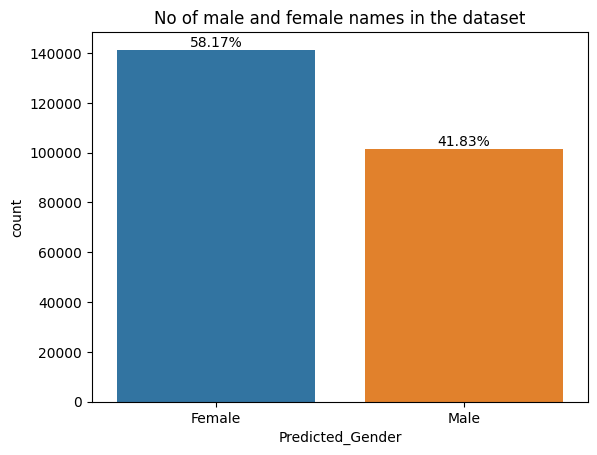

In [89]:
## plot for male and female names in the merged training data

# Calculate the counts and proportions
counts = merged_train_dt['Predicted_Gender'].value_counts()
proportions = counts / len(merged_train_dt)

# Sort the counts and proportions in descending order
sorted_counts = counts.sort_values(ascending=False)
sorted_proportions = proportions.loc[sorted_counts.index]

# Create the countplot with sorted data
ax = sns.countplot(x='Predicted_Gender', data=merged_train_dt, order=sorted_counts.index)

# Add the proportions as annotations
for i, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    label = f"{sorted_proportions[i]:.2%}"
    ax.annotate(label, (x, y), ha='center', va='bottom')

# Set the title and x-axis tick labels
plt.title('No of male and female names in the dataset')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

# Display the plot
plt.show()



In [90]:
### Train another model on merged data
## run clean function on names
merged_train_dt['Cleaned Name'] = merged_train_dt['Cleaned Name'].apply(clean_name)#apply(convert_float_and_remove_numbers).apply(truncate_drop_and_clean)
merged_train_dt.head(10)

,Cleaned Name,Predicted_Gender,customer_id
0,MUOKI,Male,NaN
1,PEACE,Female,NaN
2,MWIYERIA KANANA,Male,NaN
3,JACKLINE,Female,NaN
4,JANE MUTHONI,Female,NaN
5,JAMES WM,Male,NaN
6,BERNARD OBURA,Female,NaN
7,LUCY,Male,NaN
8,FREDERICK OTIENO,Female,NaN
9,MARY GITAU,Male,NaN


In [91]:
# Check if the 'column_of_interest' contains any missing values (NaN)
has_missing_values = merged_train_dt['Cleaned Name'].isnull().any()
# Print the result
print(has_missing_values)

False


In [92]:
## build model
X = list(merged_train_dt['Cleaned Name'])
Y = list(merged_train_dt['Predicted_Gender'])


In [93]:
## encode the labels

encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

In [94]:
## count vectorization

cv = CountVectorizer(analyzer = 'char')
X = cv.fit_transform(X).toarray()

In [95]:
## split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state= 43)

In [96]:
# Define the seed
XGB_model2 = XGBClassifier(random_state= seed) #use_label_encoder = False
XGB_model2.fit(x_train,y_train)
XGB_y_pred = XGB_model2.predict(x_test)

# # Save the model to a file
# joblib.dump(RF_model, 'rf_model2.pkl')

# # Load the model from the file
# loaded_rf_model = joblib.load('rf_model2.pkl')

# Make predictions using the ensemble model
XGB_y_pred2 = XGB_model2.predict(x_test)

predictions2 = XGB_model2.predict(df_test)

In [97]:
# for XGB
print(metrics.accuracy_score(XGB_y_pred2,y_test))

accuracy = metrics.accuracy_score(XGB_y_pred2,y_test)
print("Accuracy: %.2f%%" % (accuracy*100))

print(metrics.classification_report(y_test, XGB_y_pred2))

# print(cmatrix(RF_model2))

0.9046983548898063
Accuracy: 90.47%
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     46829
           1       0.90      0.86      0.88     33348

    accuracy                           0.90     80177
   macro avg       0.90      0.90      0.90     80177
weighted avg       0.90      0.90      0.90     80177



In [98]:
# Define the seed
seed = 45

RF_model = RandomForestClassifier(random_state=seed)
RF_model.fit(x_train, y_train)

# Save the model to a file
joblib.dump(RF_model, 'rf_model2.pkl')

# Load the model from the file
loaded_rf_model = joblib.load('rf_model2.pkl')

# Make predictions using the ensemble model
RF_y_pred2 = loaded_rf_model.predict(x_test)

predictions2 = loaded_rf_model.predict(df_test)

In [99]:
# for RF
print(metrics.accuracy_score(RF_y_pred2,y_test))

accuracy = metrics.accuracy_score(RF_y_pred2,y_test)
print("Accuracy: %.2f%%" % (accuracy*100))

print(metrics.classification_report(y_test, RF_y_pred2))

# print(cmatrix(RF_model2))

0.9419783728500692
Accuracy: 94.20%
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     46829
           1       0.95      0.91      0.93     33348

    accuracy                           0.94     80177
   macro avg       0.94      0.94      0.94     80177
weighted avg       0.94      0.94      0.94     80177



#### Running Prediction on Entire Customer Profile Data

In [100]:
# Download  entire cust dataset from Domo
cust_prof = domo.ds_get('6ab44284-0840-4af4-a316-09e993e0065a')
cust_prof.head()

,customer_id,num_canisters,name,gender,is_club_customer
0,NaN,2977,NaN,NaN,NaN
1,3174531.0,1,DAMARIS WANGARI,1.0,0.0
2,3208886.0,1,OLGA D,NaN,0.0
3,1111966.0,1,MARY NGLN,1.0,0.0
4,1249576.0,1,AMIR,2.0,0.0


In [101]:
## check shape
cust_prof.shape

(872535, 5)

In [102]:
# Map values from 1 to "female" and 2 to "male" in the 'Gender' column
cust_prof['gender'] = cust_prof['gender'].map({1: 'Female', 2: 'Male'})

In [103]:
## select key cols

cols_of_interest = ['customer_id','name']#,'gender'
cust_prof = cust_prof[cols_of_interest]
 

In [104]:
matched_data_rows = pd.concat([matched_rows,mismatch_clean],axis=0,ignore_index=True)
matched_data_rows.shape

(238711, 3)

In [105]:
matched_data_rows.head()


,customer_id,Cleaned Name,Predicted_Gender
0,3174531,DAMARIS WANGARI,Female
1,1111966,MARY NGLN,Female
2,1249576,AMIR,Male
3,841007,LEAH,Female
4,1657921,GRACE,Female


In [106]:

## filter data already in train data
cust_prof = cust_prof.reset_index(drop=True)
matched_data_rows = matched_data_rows.reset_index(drop=True)

df4 = cust_prof.drop(cust_prof[cust_prof['customer_id'].isin(matched_data_rows['customer_id'])].index)
## check shape after
df4.shape

(644615, 2)

In [107]:
## drop nas
df4 = df4.dropna(how = 'all')
## rename cols
df4 = df4.rename(columns= {'name': 'Name'})#,'gender':'Gender'
df4.head()

,customer_id,Name
2,3208886.0,OLGA D
5,2730346.0,IRENE
8,2689295.0,BENARD
9,2542679.0,EDWARD WAMAI
11,2089987.0,LUCY MWANGI


In [108]:
# Check if the 'column_of_interest' contains any missing values (NaN)
has_missing_values = df4['Name'].isnull().any()
# Print the result
print(has_missing_values)

False


In [109]:
  ## proportion of one-word names
one_word_names3 = round(count_one_word_names(df4['Name'])/len(df4)*100,2)

print(f"The proportion of one-word-names is: {one_word_names3}%")

The proportion of one-word-names is: 49.76%


##### Pre-Processing Final Prediction Data

In [110]:
def add_name_length_column(names):
  """Adds a column of the number of characters in each name to a DataFrame.

  Args:
    names: A list of names.

  Returns:
    A DataFrame with a column of the number of characters in each name.
  """
  name_lengths = []
  for name in names:
    name_length = len(name)
    name_lengths.append(name_length)

  df = pd.DataFrame({'Name': names})
  df['Name Length'] = name_lengths
  return df

In [111]:
## check the name with most characters

# df4 = add_name_length_column(df4['Name']).sort_values(by ='Name Length' ,ascending=False)
# df4.head()

In [112]:

# Apply the truncate_names function to the 'Name' column
df4['Cleaned Name'] = df4['Name'].apply(clean_name)
df4.head()



,customer_id,Name,Cleaned Name
2,3208886.0,OLGA D,OLGA D
5,2730346.0,IRENE,IRENE
8,2689295.0,BENARD,BENARD
9,2542679.0,EDWARD WAMAI,EDWARD WAMAI
11,2089987.0,LUCY MWANGI,LUCY MWANGI


In [113]:
## preprocessing transforms
dm_test = list(df4['Cleaned Name'])

In [115]:
## vectorization

dm_test = cv.fit_transform(dm_test).toarray()

In [116]:
## check shape of training vs test data
# df_test2 = truncated_array
print("Shape of dm_test:", dm_test.shape)
# print("Shape of truncated_array:", truncated_array.shape)

print("Shape of df_train:", X.shape)

Shape of dm_test: (644614, 27)
Shape of df_train: (242960, 27)


##### Load and Run Saved model

In [117]:

# Load the model from the file
loaded_rf_model = joblib.load('rf_model2.pkl')

# Make predictions using the ensemble model
RF_y_pred2 = loaded_rf_model.predict(x_test)

predictions2 = loaded_rf_model.predict(dm_test)

In [118]:
predictions2 = predictions2.tolist()
# customer_f_dt = customer_f_dt.reset_index(drop=True)

cust_profile_predictions = pd.DataFrame({'customer_id': df4['customer_id'],'Cleaned Name': df4['Cleaned Name'],'Predicted_Gender': encoder.inverse_transform(predictions2)
})
cust_profile_predictions.head()


,customer_id,Cleaned Name,Predicted_Gender
2,3208886.0,OLGA D,Male
5,2730346.0,IRENE,Female
8,2689295.0,BENARD,Male
9,2542679.0,EDWARD WAMAI,Male
11,2089987.0,LUCY MWANGI,Female


In [119]:
cust_profile_predictions.shape

(644614, 3)

##### Append Predictions to Train data

In [120]:
cust_prof_gender_predictions.head()

,customer_id,Cleaned Name,Predicted_Gender
0,3174531,DAMARIS WANGARI,Female
1,1111966,MARY NGLN,Female
2,1249576,AMIR,Male
3,841007,LEAH,Female
4,1657921,GRACE,Female


In [121]:
## append matched rows with dt
all_cust_prof_data = pd.concat([cust_prof_gender_predictions,cust_profile_predictions],axis=0, ignore_index=True)
all_cust_prof_data.shape

(900377, 3)

In [122]:
all_cust_prof_data.head()

,customer_id,Cleaned Name,Predicted_Gender
0,3174531.0,DAMARIS WANGARI,Female
1,1111966.0,MARY NGLN,Female
2,1249576.0,AMIR,Male
3,841007.0,LEAH,Female
4,1657921.0,GRACE,Female


In [123]:
## Drop Duplicated records
all_cust_prof_data.drop_duplicates(subset='customer_id', inplace=True)

all_cust_prof_data.shape

(872534, 3)

#### Visualize Gender Proportions

In [124]:
  ## proportion of one-word names
one_word_names4 = round(count_one_word_names(all_cust_prof_data['Cleaned Name'])/len(all_cust_prof_data)*100,2)

print(f"The proportion of one-word-names is: {one_word_names4}%")

The proportion of one-word-names is: 52.68%


In [125]:
# %%
all_cust_prof_data['Predicted_Gender'].value_counts()

Female    514791
Male      357743
Name: Predicted_Gender, dtype: int64

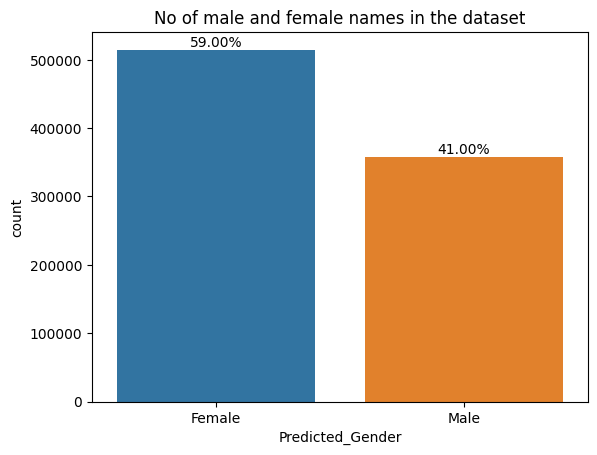

In [126]:
## plot for male and female names in the data
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
ax = sns.countplot(x='Predicted_Gender', data=all_cust_prof_data)

# Calculate the total count for each category
total_counts = all_cust_prof_data['Predicted_Gender'].value_counts()

# Calculate the proportions for each category
proportions = total_counts / total_counts.sum()

# Sort the counts and proportions in descending order
sorted_counts = total_counts.sort_values(ascending=False)
sorted_proportions = proportions.loc[sorted_counts.index]

# Add the proportions as annotations
for i, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    label = f"{sorted_proportions[i]:.2%}"
    ax.annotate(label, (x, y), ha='center', va='bottom')

# Set the title and x-axis tick labels
plt.title('No of male and female names in the dataset')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

# Display the plot
plt.show()



#### Output Predictions

In [127]:
## duplicate data for checking additional rows
current_run = all_cust_prof_data


In [128]:
## output predicted genders
all_cust_prof_data.to_csv('../../Njambanene/Tasks/Name_Identification/KOKO Users -Name based Gender Classification.csv',index=False)

In [129]:
# Create a new data set in Domo with the result, the return value is the data set id of the new data set.
# all_cust_prof_data = domo.ds_create(all_cust_prof_data,'Customer Gender Dataset','Python')
## previously created dataset
all_cust_prof_data_prev = domo.ds_get('378b0d4e-1f77-4e7d-b4f0-cb62d974e550')


In [130]:
# all_cust_prof_data = pd.read_csv('../../Njambanene/Tasks/Name_Identification/KOKO Users -Name based Gender Classification.csv')
## Check for additional rows
current_rows = current_run.shape[0]
previous_rows = all_cust_prof_data_prev.shape[0]



In [131]:
# Compare the number of rows
if current_rows > previous_rows:
    additional_rows = current_rows - previous_rows
    print(f"There are {additional_rows} additional rows in the current dataset.")
else:
    print("No additional rows have been added to the dataset.")

There are 508 additional rows in the current dataset.


In [132]:
## update the previously created dataset

all_cust_prof_data = domo.ds_update('378b0d4e-1f77-4e7d-b4f0-cb62d974e550',current_run)

In [133]:
# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time:", round(elapsed_time/60,0), "minutes")

Elapsed time: 8.0 minutes


#### Notes:
Although we were able to predict the gender of majority of the names accurately with ~96% accuracy, below are are some disclaimers that influenced the accuracy of the model:
1. One-Word Names: There was a significant number of one word names both in the training set (~63%) and the test data (~50%) that reduces the ability to predict gender accurately as some names can be in either genders.
2. Data Bias and Representation: There is a potential bias in the training data used to develop the model as female customers was ~60%  of the data. As such the model's predictions may reflect the biases present in the data, such as underrepresentation or overrepresentation.
3. Name complexity: Due to the limitation of the model processing only three names for a customer (at most), there is a possibility of incorrect predictions if two of the names could potentially belong to both male and female genders individually.
4. Third Gender Representation: It's important to note that the model does not consider gender-fluid or non-binary individuals. Instead, it primarily categorizes names into male or female genders and predicts the gender that is most commonly associated with a given name. This means that the model may not accurately represent or predict the gender for individuals who identify as gender-fluid or non-binary.
5. Name Ambiguity and Variability: Some names had numbers, names of places e.g. shops, special characters as well aliases that were dropped during name clean up. More-over some names can be gender-neutral or may have varying associations across different cultures, hence the model may be inaccurate in such instances. Names that are used for both males and females can introduce ambiguity in the model's predictions.
6. Typos: Some names are clearly typos at point of collection hence the model is likely to make a prediction on a wrong name.
 

In [ ]:
## create a function based on ner (pre-trained named entity recognition (NER) model) for name-checking 
# import spacy

# def is_name(word):
#     # Load the pre-trained English NER model from spaCy
#     nlp = spacy.load('en_core_web_sm')
    
#     # Process the word with the NER model
#     doc = nlp(word)
    
#     # Check if any entity in the word is classified as a person (PERSON)
#     return any(ent.label_ == 'PERSON' for ent in doc.ents)

